In [1]:

!pip install qiskit ipywidgets 

%matplotlib inline
from qiskit import QuantumCircuit, execute, Aer
# from qiskit.tools.jupyter import *
from qiskit.visualization import *
import numpy as np

     |████████████████████████████████| 6.0MB 5.4MB/s 
     |████████████████████████████████| 17.9MB 180kB/s 
     |████████████████████████████████| 204kB 52.5MB/s 
     |████████████████████████████████| 215kB 53.5MB/s 
     |████████████████████████████████| 2.1MB 49.5MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 1.0MB 49.6MB/s 
     |████████████████████████████████| 194kB 49.0MB/s 
     |████████████████████████████████| 81kB 11.9MB/s 
     |████████████████████████████████| 614kB 48.5MB/s 
     |████████████████████████████████| 3.2MB 49.3MB/s 
     |████████████████████████████████| 5.5MB 40.8MB/s 
  Created wheel for qiskit: filename=qiskit-0.25.0-cp37-none-any.whl size=3032 sha256=fd19cdc7e21a44195c03ab39a60f96775fbf37a0aa151c7275f32f3293f14ecc
  Stored in directory: /root/.cache/pip/wheels/09/6e/f1/a7eaab6e3943d749f1b257f462f60fbc402b0c8e870b555169
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py

In [2]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.measure(0,0) 
qc.draw()   

┌───┐┌─┐
q_0: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

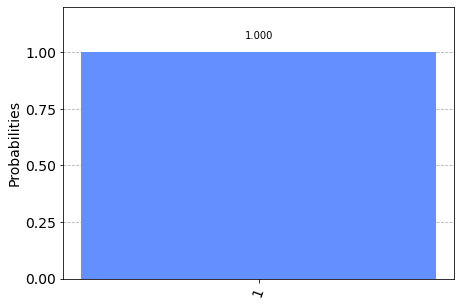

In [3]:
backend = Aer.get_backend("qasm_simulator")
job = execute(qc,backend=backend, shots =1000)
counts = job.result().get_counts()
plot_histogram(counts)

In [4]:
# only run this cell once, running it the second time might raise an error/warning as save_account() already has your token stored
from qiskit import IBMQ

# to enabble your account you'll need to enter your token from IBM Quantum Experience in 'YOUR_IBM_TOKEN' in a string format 
IBMQ.save_account('YOUR_IBM_TOKEN')

In [5]:
# loading your account
IBMQ.load_account() 

# Getting a backend for running the circuit on. In this case 'ibm_armonk'. For more devices you have access to you 
# can look into your IBM Q Experience account's dashboard.
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend("ibmq_armonk")


RequestsApiError: ignored

In [ ]:
job = execute(qc,backend=backend,shots =1000)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

In [ ]:
counts = job.result().get_counts()
plot_histogram(counts) 

In [ ]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller


def cost_function(circuit):
    if not isinstance(circuit, (QuantumCircuit)):
        print("the inserted circuit must be a QuantumCircuit object, not {}".format(type(circuit)))
    else:
        basis_gate_set = ['u3', 'cx'] # basis that we are unrolling the circuit into

        # changing our basis using an Unroller
        pass_ = Unroller(basis_gate_set)
        pm = PassManager(pass_)
        unrolled_circuit = pm.run(circuit)

        # calculating the cost function using the equation given above
        gates = unrolled_circuit.count_ops()
        circuit_cost = gates['u3'] + 10*gates['cx']
        
    return circuit_cost, gates, unrolled_circuit

In [ ]:

# Example constructing the Half Adder circuit

qc_ha = QuantumCircuit(4,2)

# ENCODE INPUTS in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier() # barrier is mainly used in this code to make the circuit more readable


# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

In [ ]:

backend = Aer.get_backend("qasm_simulator")
job = execute(qc_ha,backend=backend, shots =1000)
counts = job.result().get_counts()
plot_histogram(counts) 

In [ ]:
circuit_cost, gates, unrolled_circuit = cost_function(qc_ha)

print('Cost of the circuit : {}'.format(circuit_cost))
print('Gates counts after unrolling : {}'.format(gates))
print('Circuit after unrolling :')
unrolled_circuit.draw() 

In [ ]:
#  Sub-Task 1 :- Build a Full Adder 
 # code the full adder here

# demonstrate that it works by adding a few digits

In [ ]:
# Final Task 2 :- Build a 2 binary digit adder  
# code the 2 digit adder here

# demonstrate that it works by adding a few digits

In [ ]:

# Optional Task :- Build the 3 binary digit adder  
# code the 2 digit adder here

# demonstrate that it works by adding a few digits 
